In [13]:
#运行这个代码可以让Python不显示warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import geopandas
import geopandas as gpd
import pyproj

In [22]:
arrive=pd.read_csv(r'F:\data\yangzhou-20210501-17_res\yangzhou_res\arriveRes\20210503.csv',header=None,names=['日期','到达时间','D编号','人数','出发时间','O编号','FLAG'],encoding='utf-8')
arrive

,日期,到达时间,D编号,人数,出发时间,O编号,FLAG
0,20210503,10:35-10:40,wtv08g5,4,09:00-09:05,wtv08fw,1.0
1,20210503,08:55-09:00,wtubmdt,66,07:30-07:35,wtuybnz,1.0
2,20210503,16:30-16:35,wttyjyh,2,13:10-13:15,wtubme6,1.0
3,20210503,23:15-23:20,wtubnf6,1,23:05-23:10,wtubnfd,1.0
4,20210503,17:10-17:15,wtv0h39,4,15:55-16:00,wtv0h39,1.0
...,...,...,...,...,...,...,...
3376561,20210503,17:25-17:30,wtv00rk,5,16:55-17:00,wtv00rv,1.0
3376562,20210503,19:00-19:05,wtubm0g,24,16:20-16:25,wtufqpu,1.0
3376563,20210503,12:35-12:40,wtubq4n,81,12:20-12:25,wtubmkv,1.0
3376564,20210503,16:00-16:05,wtv02yk,29,15:45-15:50,wtv03jj,1.0


In [16]:
xinling = pd.read_csv(r'F:\\data\\扬州.csv',header=None,encoding='utf-8')#这样读取默认第一行是表头\n",
xinling   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,wtv1jyy,119.792862,32.557297,119.792175,32.557983,119.792175,32.556610,119.793549,32.557983,119.793549,32.556610,1000514,扬州市,321012,江都区
1,wtszd1y,119.276505,32.266159,119.275818,32.266846,119.275818,32.265472,119.277191,32.266846,119.277191,32.265472,1000514,扬州市,321081,仪征市
2,wtufxkb,119.498978,32.809982,119.498291,32.810669,119.498291,32.809296,119.499664,32.810669,119.499664,32.809296,1000514,扬州市,321084,高邮市
3,wtsxxsw,119.166641,32.281265,119.165955,32.281952,119.165955,32.280579,119.167328,32.281952,119.167328,32.280579,1000514,扬州市,321081,仪征市
4,wtv4cf0,119.608841,32.838821,119.608154,32.839508,119.608154,32.838135,119.609528,32.839508,119.609528,32.838135,1000514,扬州市,321084,高邮市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335323,wtuu7yv,119.352036,33.128586,119.351349,33.129272,119.351349,33.127899,119.352722,33.129272,119.352722,33.127899,1000514,扬州市,321023,宝应县
335324,wtuvntz,119.475632,33.254929,119.474945,33.255615,119.474945,33.254242,119.476318,33.255615,119.476318,33.254242,1000514,扬州市,321023,宝应县
335325,wtv1njb,119.795609,32.551804,119.794922,32.552490,119.794922,32.551117,119.796295,32.552490,119.796295,32.551117,1000514,扬州市,321012,江都区
335326,wtsz8rr,119.200974,32.296371,119.200287,32.297058,119.200287,32.295685,119.201660,32.297058,119.201660,32.295685,1000514,扬州市,321081,仪征市


In [17]:
xinling['区编号']=xinling.iloc[:,0]
xinling['经度']=xinling.iloc[:,1]
xinling['纬度']=xinling.iloc[:,2]

In [62]:
QSY=xinling.loc[:,['区编号','经度','纬度']]
QSY

,区编号,经度,纬度
0,wtv1jyy,119.792862,32.557297
1,wtszd1y,119.276505,32.266159
2,wtufxkb,119.498978,32.809982
3,wtsxxsw,119.166641,32.281265
4,wtv4cf0,119.608841,32.838821
...,...,...,...
335323,wtuu7yv,119.352036,33.128586
335324,wtuvntz,119.475632,33.254929
335325,wtv1njb,119.795609,32.551804
335326,wtsz8rr,119.200974,32.296371


In [24]:
line = pd.read_csv(r'F:\\data\\扬州公交\\line_5_6\\线路shp\\1002_line.csv',encoding='gbk')#默认第一行是表头
stop=pd.read_csv(r'F:\\data\\扬州公交\\stop_5_6\\1002.csv',encoding='utf-8')

In [63]:
#-*-coding=utf-8 -*-\n",
import pyproj
import pandas as pd
import numpy as np
#data = pd.read_csv(\"test.csv\",sep=',',header='infer')#将第一行作为表头,
p1 = pyproj.Proj(init="epsg:4326")#wgs坐标系统的EPSG Code,
p2 = pyproj.Proj(init="epsg:32651")#UTM 51N坐标系统的EPSG Code\n",
lonprj, latprj = pyproj.transform(p1, p2,stop['LONGITUDE'], stop['LATITUDE'])
lonprj2, latprj2 = pyproj.transform(p1, p2,line['LONGITUDE'], line['LATITUDE'])
lonprj3, latprj3 = pyproj.transform(p1, p2,QSY['经度'], QSY['纬度'])

In [64]:
##将数组转换为PD\n",
stop['lons']=pd.DataFrame(lonprj)
stop['lats']=pd.DataFrame(latprj)
line['lons']=pd.DataFrame(lonprj2)
line['lats']=pd.DataFrame(latprj2)
QSY['lons']=pd.DataFrame(lonprj3)
QSY['lats']=pd.DataFrame(latprj3)

In [65]:
from shapely.geometry import Point
#对栅格GPS点生成点要素，并转换为一个GeoDataFrame，方便后续的地图匹配\n",
lon=QSY['lons']
lat=QSY['lats']
list=[]
for i in range(0,len(QSY)):
    g=Point(lon[i],lat[i])
    list.append(g)
    pass
list = gpd.GeoDataFrame(list)###转换为pd形式
QSY['geometry']=list
QSY['geometry']

0          POINT (198848.6170381246 3606749.1877728566)
1          POINT (149208.7872097168 3576028.4108419414)
2          POINT (172164.9988051047 3635653.2591072964)
3          POINT (138911.92657031235 3578069.665969615)
4           POINT (182560.4135107388 3638516.752935278)
                              ...                      
335323     POINT (159624.26312268496 3671468.904006002)
335324    POINT (171635.11672724423 3685091.1917552133)
335325    POINT (199088.27910198615 3606132.0775836003)
335326    POINT (142207.41093595064 3579630.4572813855)
335327    POINT (183553.18058406818 3673257.2436984773)
Name: geometry, Length: 335328, dtype: object

In [56]:
##生成站点的的点要素
lon=stop['lons']
lat=stop['lats']
stoplist=[]
for i in range(0,len(stop)):
    g=Point(lon[i],lat[i])
    stoplist.append(g)
    pass
stoplist = gpd.GeoDataFrame(stoplist)###转换为pd形式
list
stop['geometry']=stoplist
stop['geometry']

0      POINT (166697.34764970565 3590204.978737102)
1      POINT (163763.04466677562 3587365.510130677)
2     POINT (164480.93185120734 3588036.2429868686)
3      POINT (164322.42941936722 3587460.996987099)
4     POINT (164837.48637842038 3589317.0304867653)
5     POINT (166067.61842303537 3589679.7933151573)
6     POINT (167396.97367925104 3591798.5173108783)
7      POINT (167115.50642985903 3591785.188472469)
8      POINT (164717.67816632404 3588940.296920368)
9       POINT (166121.5603739717 3589550.611395583)
10      POINT (167420.6134938508 3591778.409477309)
11       POINT (169145.0452463391 3591619.93008185)
12     POINT (167081.04313258477 3591754.456243544)
13     POINT (163937.6033015336 3587407.7664682567)
14     POINT (163717.05549160455 3587357.274139858)
15      POINT (165574.30015763897 3589319.58304105)
16     POINT (165666.71748023736 3589321.616870428)
17      POINT (165230.68411629775 3589329.80229608)
18    POINT (164902.30258228222 3589324.9758372963)
19    POINT 

In [57]:
line

,LATITUDE,LONGITUDE,RECDATETIME,time_st,lons,lats,geometry
0,32.413374,119.464963,2021/5/6 7:46:36,27996,167513.230712,3.591759e+06,LINESTRING (167513.2307115668 3591758.79389605...
1,32.413374,119.464963,2021/5/6 7:46:36,27996,167513.230712,3.591759e+06,LINESTRING (167513.2307115668 3591758.79389605...
2,32.413341,119.465074,2021/5/6 7:46:41,28001,167523.555226,3.591755e+06,LINESTRING (167513.2307115668 3591758.79389605...
3,32.413341,119.465074,2021/5/6 7:46:41,28001,167523.555226,3.591755e+06,LINESTRING (167513.2307115668 3591758.79389605...
4,32.413305,119.465330,2021/5/6 7:46:46,28006,167547.514076,3.591750e+06,LINESTRING (167513.2307115668 3591758.79389605...
...,...,...,...,...,...,...,...
1633,32.374295,119.434690,2021/5/6 8:49:49,31789,164519.625954,3.587518e+06,LINESTRING (167513.2307115668 3591758.79389605...
1634,32.373991,119.434508,2021/5/6 8:49:54,31794,164501.365799,3.587485e+06,LINESTRING (167513.2307115668 3591758.79389605...
1635,32.373991,119.434508,2021/5/6 8:49:54,31794,164501.365799,3.587485e+06,LINESTRING (167513.2307115668 3591758.79389605...
1636,32.373796,119.434164,2021/5/6 8:49:59,31799,164468.256969,3.587464e+06,LINESTRING (167513.2307115668 3591758.79389605...


In [58]:
#生成线路的线要素
from shapely.geometry import LineString
dianlon=line['lons']
dianlat=line['lats']
dianlist=[]
for i in range(0,len(line)):
    g=(dianlon[i],dianlat[i])
    dianlist.append(g)
    pass
dianlist
linestr = LineString(dianlist)
line['geometry']=linestr
line['geometry']

0       LINESTRING (167513.2307115668 3591758.79389605...
1       LINESTRING (167513.2307115668 3591758.79389605...
2       LINESTRING (167513.2307115668 3591758.79389605...
3       LINESTRING (167513.2307115668 3591758.79389605...
4       LINESTRING (167513.2307115668 3591758.79389605...
                              ...                        
1633    LINESTRING (167513.2307115668 3591758.79389605...
1634    LINESTRING (167513.2307115668 3591758.79389605...
1635    LINESTRING (167513.2307115668 3591758.79389605...
1636    LINESTRING (167513.2307115668 3591758.79389605...
1637    LINESTRING (167513.2307115668 3591758.79389605...
Name: geometry, Length: 1638, dtype: object

In [85]:
QSY

,区编号,经度,纬度,lons,lats,geometry,project,geometry_orgin,diff
140,wtubnnf,119.446793,32.381516,165685.693640,3.588281e+06,POINT (164851.31939754693 3588112.4074473167),12179.879681,POINT (165685.69363998633 3588281.1539942785),851.267158
915,wtubqyk,119.482498,32.422714,169197.531452,3.592740e+06,POINT (169236.6565617394 3592170.2107995665),2314.747429,POINT (169197.5314515066 3592740.4850195497),571.614783
1083,wtubqv5,119.481125,32.415848,169043.197767,3.591983e+06,POINT (169254.16813506963 3591965.1034799134),2537.681200,POINT (169043.19776711316 3591982.9846510054),211.726787
1101,wtubqtn,119.474258,32.415848,168397.046111,3.592004e+06,POINT (168366.869845956 3591639.1664099493),3725.841210,POINT (168397.04611114244 3592004.3055784027),366.383978
1406,wtubq5p,119.453659,32.404861,166418.092420,3.590850e+06,POINT (166489.70862864854 3590850.1477514324),6610.595177,POINT (166418.09242044005 3590849.688411954),71.617681
...,...,...,...,...,...,...,...,...,...
333622,wtubq4f,119.446793,32.403488,165766.784081,3.590719e+06,POINT (166046.89056012844 3590059.7631692262),8164.113686,POINT (165766.78408117784 3590718.818233367),716.109780
333927,wtubjrr,119.420700,32.384262,163239.541284,3.588668e+06,POINT (163400.7631148732 3588199.9640690116),13655.613448,POINT (163239.54128426348 3588667.853851046),494.887186
334198,wtubju1,119.434433,32.366409,164466.242288,3.586644e+06,POINT (164468.25696929777 3587464.3489081743),15439.198751,POINT (164466.24228796636 3586644.0147525202),820.336630
334833,wtubjqm,119.417953,32.378769,162960.551470,3.588067e+06,POINT (163386.60728144785 3588185.333019681),13675.971621,POINT (162960.5514697752 3588067.096052572),442.157817


In [67]:
#地图匹配
lineshp=line['geometry'].iloc[1]
QSY['project'] = QSY['geometry'].apply(lambda r:lineshp.project(r))
#原始的坐标点存储在一个字段中
QSY['geometry_orgin'] = QSY['geometry']
#生成匹配的坐标点
QSY['geometry'] = QSY['project'].apply(lambda r:lineshp.interpolate(r))###差值拟合匹配
QSY['project']

0          2379.930891
1         13675.971621
2          2314.747429
3         13675.971621
4          2314.747429
              ...     
335323     2314.747429
335324     2314.747429
335325     2379.930891
335326    13675.971621
335327     2314.747429
Name: project, Length: 335328, dtype: float64

In [68]:
#批量计算原始点和匹配点之间的距离
QSY['diff'] = QSY.apply(lambda r:r['geometry_orgin'].distance(r['geometry']),axis = 1)
QSY['diff']

0         32992.562717
1         18676.223891
2         43581.540570
3         26482.762616
4         48223.691970
              ...     
335323    79879.164066
335324    92951.930119
335325    32940.353150
335326    22841.721843
335327    82341.179032
Name: diff, Length: 335328, dtype: float64

In [69]:
#储存
QSY.to_csv(r'F:\data\扬州公交\TEST\QSY.csv',index=None)
stop.to_csv(r'F:\data\扬州公交\TEST\stop.csv',index=None)
line.to_csv(r'F:\data\扬州公交\TEST\line.csv',index=None)

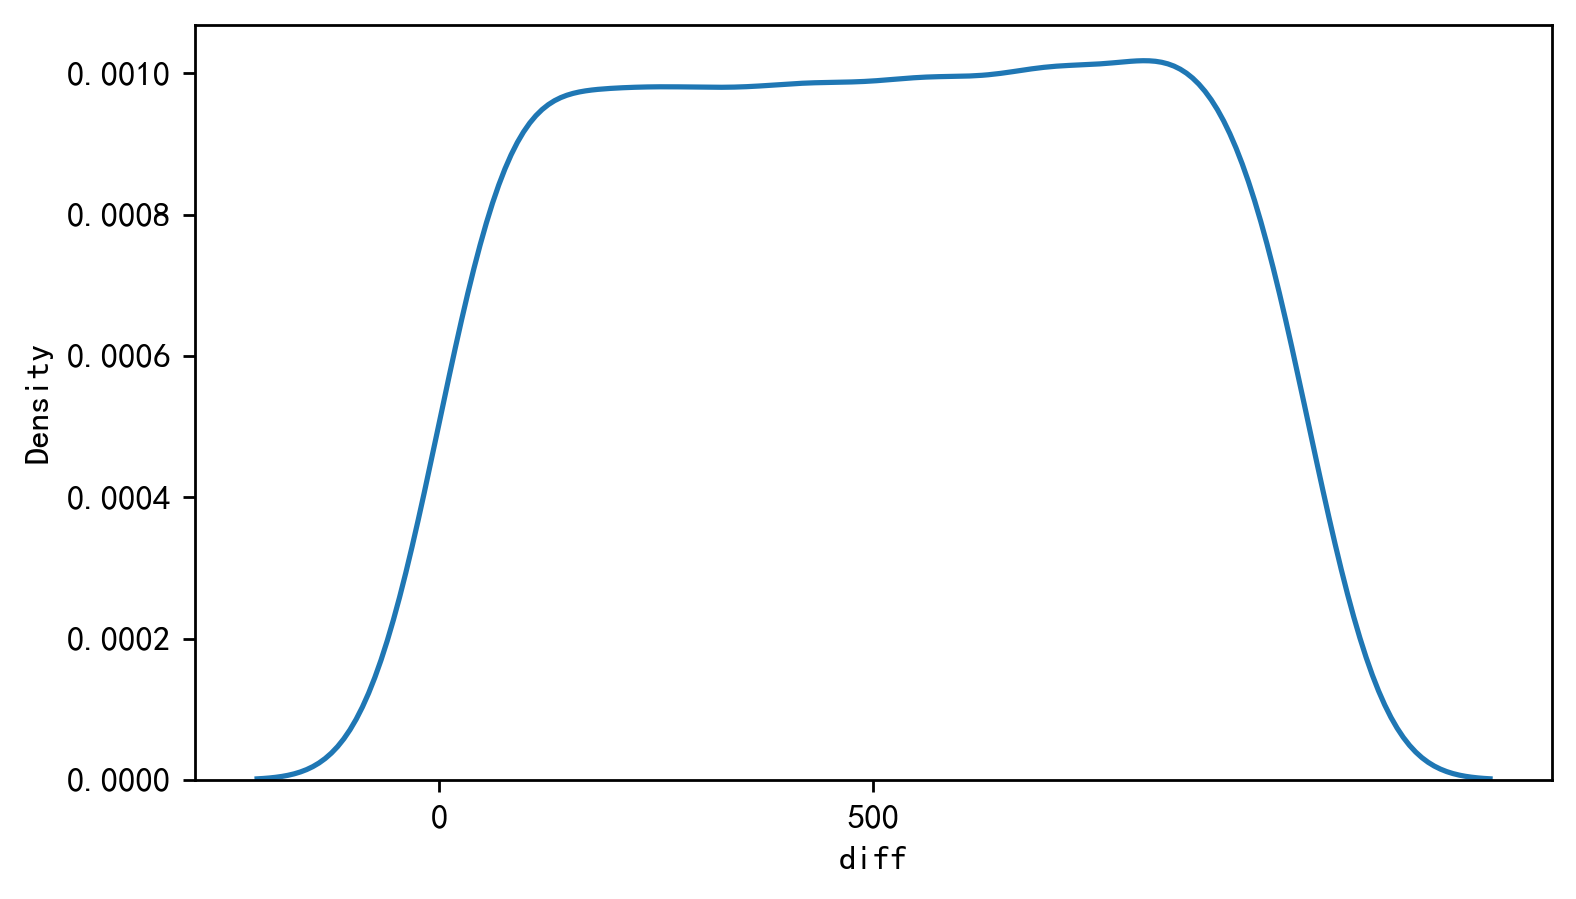

In [70]:
#绘制栅格到线路距离分布的核密度分布\
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)    
ax1      = plt.subplot(111)
sns.kdeplot(QSY[QSY['diff']<1000]['diff'])

plt.xticks(range(0,1000,500),range(0,1000,500))##实际范围和标志，最后是步长\n",
plt.show()

In [86]:
QSY = pd.read_csv(r'F:\data\扬州公交\TEST\QSY.csv',encoding='utf-8')#默认第一行是表头，所有栅格地图匹配后

In [92]:
lineQSY=QSY[QSY['diff']<300]##准备替换为沿线300米内

In [102]:
lineQSY.to_csv(r'F:\data\扬州公交\TEST\lineQSY.csv',index=None)

In [96]:
lineQSY= pd.read_csv(r'F:\data\扬州公交\TEST\lineQSY.csv',encoding='utf-8')#默认第一行是表头，所有栅格地图匹配后

In [103]:
import math
###将所有小区匹配到最近的站点上
#for k in range(0,len(lineQSY)):
match=[]
nearestd=[]
for k in range(0,len(lineQSY)):###range写法要求索引连续完整
    distance=[]
    for i in range(0,len(stop)):        
        x1 = stop.loc[i,'lons']
        y1 = stop.loc[i,'lats']
        x2 = lineQSY.loc[k,'lons']
        y2 = lineQSY.loc[k,'lats']
        #print(math.sqrt((x2-x1)**2+(y2-y1)**2))
        distance.append(math.sqrt((x2-x1)**2+(y2-y1)**2))
    #print(distance)
    #print(len(distance))
    # 求列表最小值及索引
    min_value = min(distance) # 求列表最小值
    min_idx = distance.index(min_value) # 求最小值对应索引
    #print(min_value)
    #print(min_idx )
    nearestd.append(min_value)
    match.append(min_idx)

In [104]:
###最近站点整理
lineQSY['最近站名索引']=match
lineQSY['最近站距离']=nearestd
lineQSY['最近站名']=None
lineQSY['最近站编号']=None

In [105]:
for k in range(0,len(lineQSY)):
    sy=lineQSY['最近站名索引'].loc[k]
    lineQSY['最近站名'].loc[k]=stop['STATIONNAME'].loc[sy]
    lineQSY['最近站编号'].loc[k]=stop['STATIONNO'].loc[sy]
lineQSY

,区编号,经度,纬度,lons,lats,geometry,project,geometry_orgin,diff,最近站名索引,最近站距离,最近站名,最近站编号
0,wtubqv5,119.481125,32.415848,169043.197767,3.591983e+06,POINT (169254.16813506963 3591965.1034799134),2537.681200,POINT (169043.19776711316 3591982.9846510054),211.726787,51,257.326779,广陵新城公交首末站,116602
1,wtubq5p,119.453659,32.404861,166418.092420,3.590850e+06,POINT (166489.70862864854 3590850.1477514324),6610.595177,POINT (166418.09242044005 3590849.688411954),71.617681,37,70.543857,江都路安康路,102853
2,wtubjv7,119.437180,32.373276,164750.243296,3.587397e+06,POINT (164519.6259539096 3587518.056303239),15362.378922,POINT (164750.24329636595 3587397.163337336),260.383309,48,343.235292,教院附中,119361
3,wtubq3g,119.459152,32.397995,166909.823318,3.590071e+06,POINT (166708.8165475533 3590059.3285521045),7481.713099,POINT (166909.82331843948 3590070.7648670455),201.331844,34,232.788455,江都路文昌中路,110243
4,wtubqsd,119.468765,32.413101,167870.043849,3.591717e+06,POINT (167859.0478874477 3591685.8715331475),4244.047521,POINT (167870.04384942347 3591716.6867763046),32.718349,42,57.890058,名城运河锦园,107392
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,wtubq4j,119.450912,32.399368,166139.342867,3.590249e+06,POINT (166119.7431607003 3590065.893661277),8090.916848,POINT (166139.3428666849 3590248.8615382374),184.014653,29,189.848122,解放桥（旅游集散中心）,103964
353,wtubq72,119.455032,32.406235,166552.398056,3.590998e+06,POINT (166477.89916763245 3590985.3702588943),6474.704945,POINT (166552.3980559212 3590997.750246282),75.520517,37,140.863260,江都路安康路,102853
354,wtubjwx,119.431686,32.380142,164258.505562,3.588176e+06,POINT (164261.7904235138 3588196.158438226),12785.692489,POINT (164258.50556184165 3588176.192630397),20.234223,24,115.178140,通扬桥东,108732
355,wtubq3f,119.457779,32.397995,166780.566262,3.590075e+06,POINT (166708.1222723358 3590067.9781677937),7473.035619,POINT (166780.5662624804 3590075.0511701033),72.788454,34,118.771802,江都路文昌中路,110243


In [106]:
lineQSY.to_csv(r'F:\data\扬州公交\TEST\lineQSY.csv',index=None)

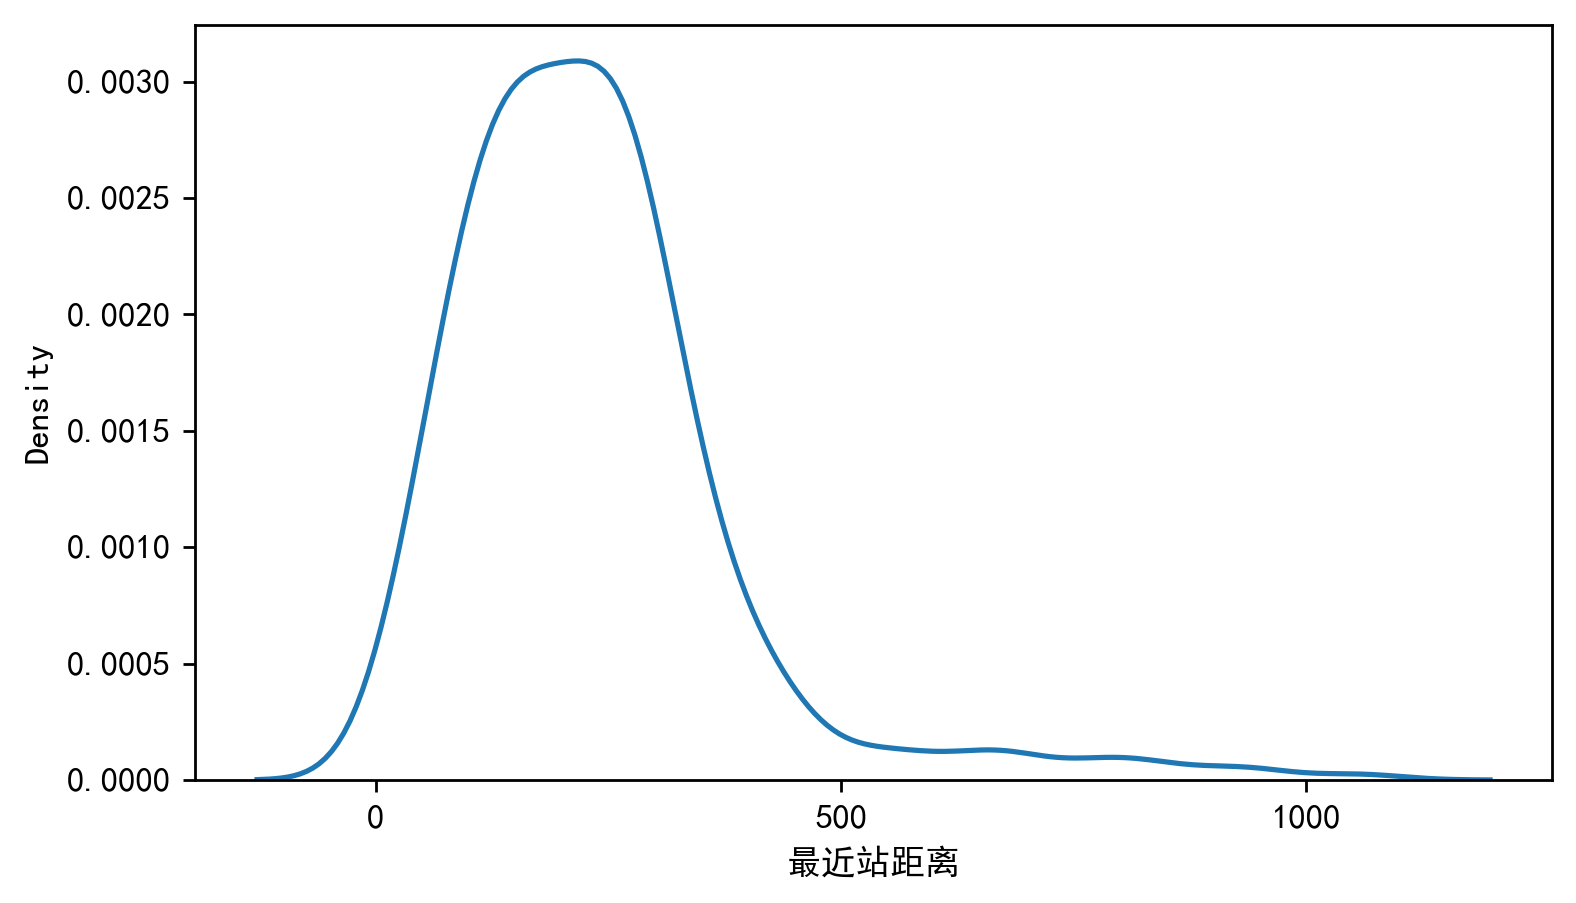

In [100]:
#绘制栅格到最近的站点的距离密度分布
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)   
ax1      = plt.subplot(111)
sns.kdeplot(lineQSY[lineQSY['最近站距离']<1500]['最近站距离'])
plt.xticks(range(0,1500,500),range(0,1500,500))##实际范围和标志，最后是步长
plt.show()
###距离最近的站点在500米以内

In [101]:
lineQSY.to_csv(r'F:\data\扬州公交\TEST\lineQSY.csv',index=None)